In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import altair as alt
alt.renderers.enable('default')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
# Read the CSV file into a DataFrame
Aviation_df = pd.read_csv('Aviation_Data.csv', low_memory=False)

### First i check what the data entails ###

In [3]:
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [4]:
Aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
Aviation_df.dtypes


Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [6]:
Aviation_df.shape

(90348, 31)

In [7]:
Aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

### I started with the cleaning the data ###


In [8]:
Aviation_df.columns = Aviation_df.columns.str.replace('.', '_', regex=False)


In [9]:
Aviation_df.columns


Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [10]:
# Convert `Event.Date` and `Publication.Date` to datetime
Aviation_df['Event_Date'] = pd.to_datetime(Aviation_df['Event_Date'], errors='coerce')
Aviation_df['Publication_Date'] = pd.to_datetime(Aviation_df['Publication_Date'], format='%d-%m-%Y', errors='coerce')


In [11]:
# Convert `Latitude` and `Longitude` to numeric, coercing errors to NaN
Aviation_df['Latitude'] = pd.to_numeric(Aviation_df['Latitude'], errors='coerce')
Aviation_df['Longitude'] = pd.to_numeric(Aviation_df['Longitude'], errors='coerce')

In [12]:
Aviation_df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


In [13]:
# Fill missing numerical columns with the median
numerical_cols = ['Number_of_Engines', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
for col in numerical_cols:
    if col in Aviation_df.columns:
        Aviation_df[col] = Aviation_df[col].fillna(Aviation_df[col].median())

In [14]:
# Fill missing categorical columns with the mode
categorical_cols = [
    'Event_Id', 'Accident_Number', 'Location', 'Country', 'Airport_Code',
    'Airport_Name', 'Injury_Severity', 'Aircraft_damage', 'Aircraft_Category',
    'Registration_Number', 'Make', 'Model', 'Amateur_Built', 'Engine_Type',
    'FAR_Description', 'Purpose_of_flight', 'Weather_Condition',
    'Broad_phase_of_flight', 'Report_Status'
]
for col in categorical_cols:
    if col in Aviation_df.columns:
        Aviation_df[col] = Aviation_df[col].fillna(Aviation_df[col].mode()[0])


In [15]:
# Fill missing Date columns with backfill
date_cols = ['Event_Date', 'Publication_Date']
for col in date_cols:
    if col in Aviation_df.columns:
        Aviation_df[col] = Aviation_df[col].bfill()

In [16]:
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                90348 non-null  object        
 1   Investigation_Type      90348 non-null  object        
 2   Accident_Number         90348 non-null  object        
 3   Event_Date              90348 non-null  datetime64[ns]
 4   Location                90348 non-null  object        
 5   Country                 90348 non-null  object        
 6   Latitude                11986 non-null  float64       
 7   Longitude               11974 non-null  float64       
 8   Airport_Code            90348 non-null  object        
 9   Airport_Name            90348 non-null  object        
 10  Injury_Severity         90348 non-null  object        
 11  Aircraft_damage         90348 non-null  object        
 12  Aircraft_Category       90348 non-null  object

In [17]:
#check for duplicates
Aviation_df.duplicated().sum()


123

In [18]:
#check the actual duplicateee rows
Aviation_df[Aviation_df.duplicated()]


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
64593,20001212X19172,25-09-2020,CEN22FA424,2008-05-24,"ANCHORAGE, AK",United States,NaN,NaN,NONE,Private,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2020-11-03
69897,20001212X19172,25-09-2020,CEN22FA424,2011-04-23,"ANCHORAGE, AK",United States,NaN,NaN,NONE,Private,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2020-09-25
72601,20001212X19172,25-09-2020,CEN22FA424,2012-08-31,"ANCHORAGE, AK",United States,NaN,NaN,NONE,Private,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2020-09-25
72673,20001212X19172,25-09-2020,CEN22FA424,2012-09-08,"ANCHORAGE, AK",United States,NaN,NaN,NONE,Private,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2020-09-25
72682,20001212X19172,25-09-2020,CEN22FA424,2012-09-09,"ANCHORAGE, AK",United States,NaN,NaN,NONE,Private,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2020-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88724,20001212X19172,22-06-2022,CEN22FA424,2022-02-18,"ANCHORAGE, AK",United States,NaN,NaN,NONE,Private,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2022-07-27
88788,20001212X19172,05-07-2022,CEN22FA424,2022-03-02,"ANCHORAGE, AK",United States,NaN,NaN,NONE,Private,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2022-06-09
88908,20001212X19172,05-07-2022,CEN22FA424,2022-03-26,"ANCHORAGE, AK",United States,NaN,NaN,NONE,Private,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2022-04-08
88965,20001212X19172,13-10-2022,CEN22FA424,2022-04-05,"ANCHORAGE, AK",United States,NaN,NaN,NONE,Private,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2022-07-01


In [19]:
#remove duplicates
Aviation_df.drop_duplicates(inplace=True)


In [20]:
Aviation_df.duplicated().sum()

0

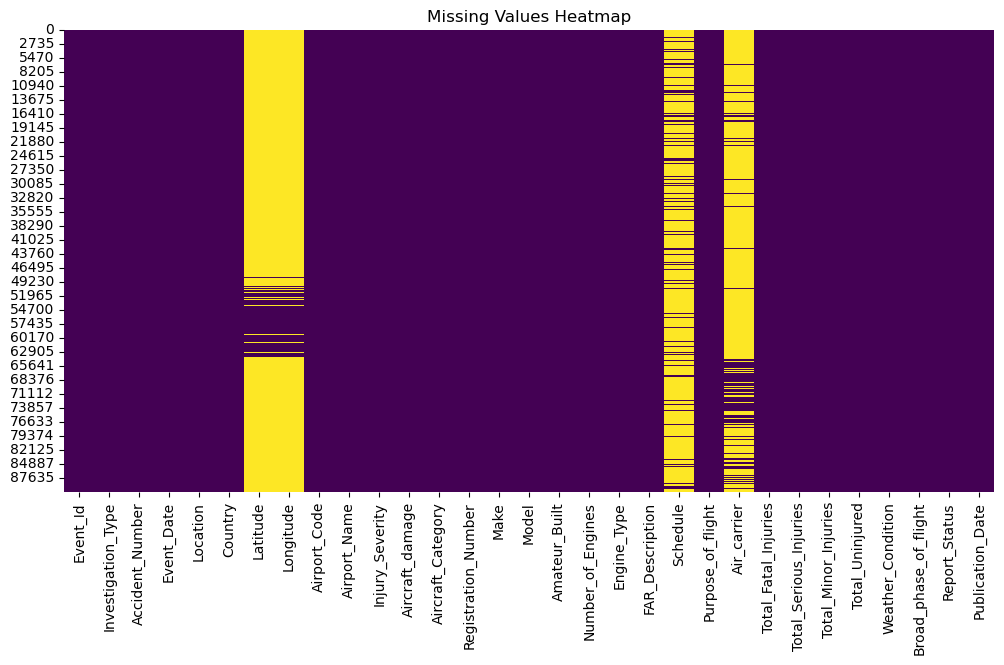

In [21]:

plt.figure(figsize=(12, 6))
sns.heatmap(Aviation_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [22]:
missing_percent = Aviation_df.isnull().mean().sort_values(ascending=False) * 100
missing_percent

Longitude                 86.728734
Latitude                  86.715434
Schedule                  86.054863
Air_carrier               81.548351
Event_Id                   0.000000
Number_of_Engines          0.000000
Report_Status              0.000000
Broad_phase_of_flight      0.000000
Weather_Condition          0.000000
Total_Uninjured            0.000000
Total_Minor_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Fatal_Injuries       0.000000
Purpose_of_flight          0.000000
FAR_Description            0.000000
Engine_Type                0.000000
Model                      0.000000
Amateur_Built              0.000000
Investigation_Type         0.000000
Make                       0.000000
Registration_Number        0.000000
Aircraft_Category          0.000000
Aircraft_damage            0.000000
Injury_Severity            0.000000
Airport_Name               0.000000
Airport_Code               0.000000
Country                    0.000000
Location                   0

In [23]:
# Drop columns with more than 80% missing values

missing_percentage = Aviation_df.isnull().mean() * 100

columns_to_drop = missing_percentage[missing_percentage > 80].index.tolist()
Aviation_df_cleaned = Aviation_df.drop(columns=columns_to_drop)

In [24]:
Aviation_df_cleaned.shape


(90225, 27)

In [25]:
# Re-categorize 'Injury_Severity' for better readability
def categorize_injury_severity(severity):
    if 'Fatal' in severity:
        return 'Fatal'
    elif 'Serious' in severity:
        return 'Serious'
    elif 'Minor' in severity:
        return 'Minor'
    elif 'Non-Fatal' in severity:
        return 'Non-Fatal'
    elif 'Incident' in severity:
        return 'Incident'
    else:
        return 'Other/Unknown'

# Apply the function to create the new categorized column
Aviation_df_cleaned['Injury_Severity_Categorized'] = Aviation_df_cleaned['Injury_Severity'].apply(categorize_injury_severity)

In [26]:
# Now, save your DataFrame to a CSV file for Tableau, including the new column
Aviation_df_cleaned.to_csv('Aviation_Data_Cleaned.csv', index=False)



##  Aviation Accident Data Analysis – Problem Statements (Focused on Aircraft Purchase Risk)

This analysis explores aviation accident data to identify crucial risk factors and characteristics of aircraft involved in incidents, with the ultimate goal of guiding purchasing decisions for a new aviation division.. Below are the major problem statements guiding this project:

---

### 1.Aircraft-Specific Risk Profile and Safety Performance:

Relevant Columns: Make, Model, Aircraft_Category, Number_of_Engines, Engine_Type, Amateur_Built, Event_Date, Total_Fatal_Injuries, Total_Serious_Injuries, Total_Minor_Injuries, Total_Uninjured, Injury_Severity_Categorized.

Which aircraft models or manufacturers have historically demonstrated the lowest average fatalities or overall injury severity rates per incident?

Are there specific design characteristics (e.g., number of engines, engine type) that correlate with a lower risk profile?

How do amateur-built or older aircraft compare in terms of risk to commercial or newer models?

---

### 2.Contextual Risk Factors Impacting Aircraft Operations:

This objective helps understand the operational environment and factors that influence accident risk, which can inform training and operational protocols.

Relevant Columns: Broad_phase_of_flight, Weather_Condition, Purpose_of_flight, Injury_Severity_Categorized, Total_Fatal_Injuries.

What are the most common phases of flight or weather conditions associated with incidents, and how might these influence operational risk for different aircraft types? (This informs the operational environment for purchased aircraft).

Are certain flight purposes (commercial, private, cargo) inherently more prone to accidents, and how might this affect the selection of aircraft for specific business ventures?

---

### 3. Geographic and Temporal Trends in Accidents (for strategic planning):

This objective provides a broader understanding of the aviation safety landscape for strategic business planning.

Relevant Columns: Event_Date, Country, Location, Total_Fatal_Injuries.

Are there specific geographic "hotspots" or regions with higher accident rates that should be considered when planning operational bases for purchased aircraft?

What are the overall trends in accident rates over time, and what does this imply about the general safety landscape of the industry for future investments?

---

- The analysis will directly support the objective of providing data-driven recommendations for purchasing low-risk aircraft and developing informed operational strategies.



### Let's first do descriptive analysis

In [27]:
print("Descriptive statistics for numerical columns:\n")
print(Aviation_df_cleaned.describe())


Descriptive statistics for numerical columns:

                          Event_Date  Number_of_Engines  Total_Fatal_Injuries  \
count                          90225       90225.000000          90225.000000   
mean   1999-12-25 23:29:32.887780608           1.134530              0.556398   
min              1948-10-24 00:00:00           0.000000              0.000000   
25%              1989-03-17 00:00:00           1.000000              0.000000   
50%              1998-10-15 00:00:00           1.000000              0.000000   
75%              2010-01-18 00:00:00           1.000000              0.000000   
max              2022-12-29 00:00:00           8.000000            349.000000   
std                              NaN           0.429647              5.089008   

       Total_Serious_Injuries  Total_Minor_Injuries  Total_Uninjured  \
count            90225.000000          90225.000000     90225.000000   
mean                 0.236930              0.304550         4.977966   
min    

In [28]:
print("\nDescriptive statistics for categorical columns:\n")
print(Aviation_df_cleaned.describe())



Descriptive statistics for categorical columns:

                          Event_Date  Number_of_Engines  Total_Fatal_Injuries  \
count                          90225       90225.000000          90225.000000   
mean   1999-12-25 23:29:32.887780608           1.134530              0.556398   
min              1948-10-24 00:00:00           0.000000              0.000000   
25%              1989-03-17 00:00:00           1.000000              0.000000   
50%              1998-10-15 00:00:00           1.000000              0.000000   
75%              2010-01-18 00:00:00           1.000000              0.000000   
max              2022-12-29 00:00:00           8.000000            349.000000   
std                              NaN           0.429647              5.089008   

       Total_Serious_Injuries  Total_Minor_Injuries  Total_Uninjured  \
count            90225.000000          90225.000000     90225.000000   
mean                 0.236930              0.304550         4.977966   
min 

### Analysis & Visualizations:

### Objective 1: Aircraft-Specific Risk Profile and Safety Performance

### 1.1 Average Fatalities by Aircraft Make (Top 20 and Bottom 20):


In [29]:
# Calculate average fatalities per make
avg_fatalities_by_make = Aviation_df_cleaned.groupby('Make')['Total_Fatal_Injuries'].mean().reset_index()
avg_fatalities_by_make = avg_fatalities_by_make.rename(columns={'Total_Fatal_Injuries': 'Average_Fatalities'})

In [30]:
# Filter out makes with very few incidents to focus on more robust data

min_incidents = Aviation_df_cleaned['Make'].value_counts()
relevant_makes = min_incidents[min_incidents >= 10].index # Only makes with at least 10 incidents
avg_fatalities_by_make = avg_fatalities_by_make[avg_fatalities_by_make['Make'].isin(relevant_makes)]

In [31]:
# Sort for top 20 (highest average fatalities)
top_20_fatal_makes = avg_fatalities_by_make.sort_values(by='Average_Fatalities', ascending=False).head(20)


In [32]:
# Chart for Top 20 (Highest) Average Fatalities by Aircraft Make
chart_top_fatal_makes = alt.Chart(top_20_fatal_makes).mark_bar().encode(
    x=alt.X('Average_Fatalities:Q', title='Average Fatalities per Incident'),
    y=alt.Y('Make:N', sort='-x', title='Aircraft Make'),
    tooltip=['Make', 'Average_Fatalities']
).properties(
    title='Top 20 Aircraft Makes by Average Fatalities per Incident (Highest Risk)',
    width=800,  
    height=700  
)
chart_top_fatal_makes

alt.Chart(...)

The chart above  highlights aircraft manufacturers with the highest average number of fatal injuries per incident, indicating potentially higher-risk makes.

In [33]:
# Sort for bottom 20 (lowest average fatalities) - these are potential "lowest risk"
bottom_20_fatal_makes = avg_fatalities_by_make.sort_values(by='Average_Fatalities', ascending=True).head(20)


In [34]:
# Chart for Bottom 20 (Lowest) Average Fatalities by Aircraft Make
chart_bottom_fatal_makes = alt.Chart(bottom_20_fatal_makes).mark_bar().encode(
    x=alt.X('Average_Fatalities:Q', title='Average Fatalities per Incident'),
    y=alt.Y('Make:N', sort='x', title='Aircraft Make'),
    tooltip=['Make', 'Average_Fatalities']
).properties(
    title='Bottom 20 Aircraft Makes by Average Fatalities per Incident (Lowest Risk)',
    width=800,  
    height=600  
)
chart_bottom_fatal_makes

alt.Chart(...)

The chart above displays aircraft manufacturers with the lowest average number of fatal injuries per incident, suggesting potentially lower-risk options for the company's new endeavor.

### # 1.2 Overall Injury Severity by Aircraft Category


In [35]:
#Injury Severity (Categorized) by Aircraft Category
injury_by_category_categorized = Aviation_df_cleaned.groupby(['Aircraft_Category', 'Injury_Severity_Categorized']).size().reset_index(name='Count')

In [36]:
chart_injury_by_category = alt.Chart(injury_by_category_categorized).mark_bar().encode(
    x=alt.X('Aircraft_Category:N', title='Aircraft Category'),
    y=alt.Y('Count:Q', title='Number of Incidents'),
    color=alt.Color('Injury_Severity_Categorized:N', title='Injury Severity'),
    tooltip=['Aircraft_Category', 'Injury_Severity_Categorized', 'Count']
).properties(
    title='Injury Severity by Aircraft Category',
    width=800,  
    height=600
).interactive()

chart_injury_by_category
    

alt.Chart(...)

Thie above stacked bar chart shows the breakdown of injury severity categories across different aircraft categories. It helps identify which categories tend to have more fatal, serious, or minor incidents.

###  1.3 Design characteristics (Number of Engines, Engine Type) vs. risk

In [37]:
# Injury Severity by Number of Engines
injury_by_num_engines = Aviation_df_cleaned.groupby(['Number_of_Engines', 'Injury_Severity_Categorized']).size().reset_index(name='Count')

# Convert Number_of_Engines to string to treat it as nominal for plotting purposes if needed,
# or keep as quantitative if we want to treat it as an ordered quantity.Given it's a small number of discrete values, nominal is fine for clear labels.
injury_by_num_engines['Number_of_Engines'] = injury_by_num_engines['Number_of_Engines'].astype(str)


In [38]:
chart_injury_by_num_engines = alt.Chart(injury_by_num_engines).mark_bar().encode(
    x=alt.X('Number_of_Engines:N', title='Number of Engines'),
    y=alt.Y('Count:Q', title='Number of Incidents'),
    color=alt.Color('Injury_Severity_Categorized:N', title='Injury Severity'),
    tooltip=['Number_of_Engines', 'Injury_Severity_Categorized', 'Count']
).properties(
    title='Injury Severity by Number of Engines',
    width=800,  
    height=600
).interactive()

chart_injury_by_num_engines

alt.Chart(...)

The chart above visualizes the distribution of injury severity across various engine types. It can inform whether certain engine technologies are correlated with higher or lower risk in terms of incident outcomes.

In [39]:
# Injury Severity by Engine Type
injury_by_engine_type = Aviation_df_cleaned.groupby(['Engine_Type', 'Injury_Severity_Categorized']).size().reset_index(name='Count')


In [40]:
chart_injury_by_engine_type = alt.Chart(injury_by_engine_type).mark_bar().encode(
    x=alt.X('Engine_Type:N', title='Engine Type'),
    y=alt.Y('Count:Q', title='Number of Incidents'),
    color=alt.Color('Injury_Severity_Categorized:N', title='Injury Severity'),
    tooltip=['Engine_Type', 'Injury_Severity_Categorized', 'Count']
).properties(
    title='Injury Severity by Engine Type',
    width=900,  
    height=700
).interactive()

chart_injury_by_engine_type

alt.Chart(...)

The above chart visualizes the distribution of injury severity across various engine types. It can inform whether certain engine technologies are correlated with higher or lower risk in terms of incident outcomes.

### 1.4 Amateur-built or older aircraft have higher accident rates

In [41]:
# Injury Severity by Amateur-Built Status
injury_by_amateur_built = Aviation_df_cleaned.groupby(['Amateur_Built', 'Injury_Severity_Categorized']).size().reset_index(name='Count')

In [42]:
chart_injury_by_amateur_built = alt.Chart(injury_by_amateur_built).mark_bar().encode(
    x=alt.X('Amateur_Built:N', title='Amateur Built Aircraft'),
    y=alt.Y('Count:Q', title='Number of Incidents'),
    color=alt.Color('Injury_Severity_Categorized:N', title='Injury Severity'),
    tooltip=['Amateur_Built', 'Injury_Severity_Categorized', 'Count']
).properties(
    title='Injury Severity by Amateur Built Status',
    width=500,  
    height=700
).interactive()

chart_injury_by_amateur_built

alt.Chart(...)

This stacked bar chart compares the injury severity outcomes for incidents involving amateur-built aircraft versus those that are not. This is key for assessing a potential risk factor for your company's purchases.

In [43]:
# Fatalities Trend over Time (general trend, as specific "older aircraft" data is not readily available)
# This addresses the temporal aspect of "older aircraft" indirectly by showing overall trends.
fatalities_over_time = Aviation_df_cleaned.copy()
fatalities_over_time['Year'] = fatalities_over_time['Event_Date'].dt.year
fatalities_over_time = fatalities_over_time.groupby('Year')['Total_Fatal_Injuries'].sum().reset_index()

In [44]:
chart_fatalities_over_time = alt.Chart(fatalities_over_time).mark_line().encode(
    x=alt.X('Year:O', title='Year'), # 'O' for ordinal, to treat years as discrete categories but ordered
    y=alt.Y('Total_Fatal_Injuries:Q', title='Total Fatal Injuries'),
    tooltip=['Year', 'Total_Fatal_Injuries']
).properties(
    title='Total Fatal Injuries Over Time',
    width=1000,  
    height=500
).interactive()

chart_fatalities_over_time

alt.Chart(...)

While this chart doesn't directly isolate "older aircraft" due to data limitations (lack of aircraft manufacturing year), it shows the overall trend of fatal injuries in aviation accidents over the years. This can provide context on the general safety improvements or challenges in the industry that would affect any fleet.

### Objective 2: Contextual Risk Factors Impacting Aircraft Operations

### 2.1 Most common phases of flight or weather conditions

In [45]:
# Injury Severity by Broad Phase of Flight 

injury_by_phase_categorized = Aviation_df_cleaned.groupby(['Broad_phase_of_flight', 'Injury_Severity_Categorized']).size().reset_index(name='Count')


In [46]:
chart_injury_by_phase = alt.Chart(injury_by_phase_categorized).mark_bar().encode(
    x=alt.X('Broad_phase_of_flight:N', title='Broad Phase of Flight'),
    y=alt.Y('Count:Q', title='Number of Incidents'),
    color=alt.Color('Injury_Severity_Categorized:N', title='Injury Severity'),
    tooltip=['Broad_phase_of_flight', 'Injury_Severity_Categorized', 'Count']
).properties(
    title='Injury Severity by Broad Phase of Flight',
    width=800,  
    height=600
).interactive()
chart_injury_by_phase

alt.Chart(...)

This stacked bar chart illustrates the distribution of incident severity across different phases of flight (e.g., takeoff, cruise, landing). Understanding these patterns can help in developing operational procedures and pilot training.

In [47]:
# Injury Severity by Weather Condition (Regenerating for structured output)
injury_by_weather = Aviation_df_cleaned.groupby(['Weather_Condition', 'Injury_Severity_Categorized']).size().reset_index(name='Count')


In [48]:
chart_injury_by_weather = alt.Chart(injury_by_weather).mark_bar().encode(
    x=alt.X('Weather_Condition:N', title='Weather Condition'),
    y=alt.Y('Count:Q', title='Number of Incidents'),
    color=alt.Color('Injury_Severity_Categorized:N', title='Injury Severity'),
    tooltip=['Weather_Condition', 'Injury_Severity_Categorized', 'Count']
).properties(
    title='Injury Severity by Weather Condition',
    width=500,  
    height=600
).interactive()
chart_injury_by_weather

alt.Chart(...)

This chart shows how different weather conditions influence the severity of aviation incidents. This information is crucial for operational planning and risk mitigation, especially when deciding where and under what conditions to operate newly acquired aircraft.

###  2.2 Flight purpose risks

In [49]:
# Injury Severity by Purpose of Flight

injury_by_purpose = Aviation_df_cleaned.groupby(['Purpose_of_flight', 'Injury_Severity_Categorized']).size().reset_index(name='Count')


In [50]:
chart_injury_by_purpose = alt.Chart(injury_by_purpose).mark_bar().encode(
    x=alt.X('Purpose_of_flight:N', title='Purpose of Flight'),
    y=alt.Y('Count:Q', title='Number of Incidents'),
    color=alt.Color('Injury_Severity_Categorized:N', title='Injury Severity'),
    tooltip=['Purpose_of_flight', 'Injury_Severity_Categorized', 'Count']
).properties(
    title='Injury Severity by Purpose of Flight',
    width=900,  
    height=500
).interactive()
chart_injury_by_purpose

alt.Chart(...)

This chart assesses whether certain flight purposes (e.g., commercial, private, cargo) are associated with higher or lower injury severity outcomes. This is directly relevant if your new aviation division has a specific business purpose in mind.

In [51]:
# Prepare data for plotting accidents by weather condition over time
accidents_by_weather = Aviation_df_cleaned.copy()
accidents_by_weather['Year'] = accidents_by_weather['Event_Date'].dt.year

In [52]:
# Filter for IMC and VMC specific data
accidents_by_weather_filtered = accidents_by_weather[
    accidents_by_weather['Weather_Condition'].isin(['IMC', 'VMC'])
    ]

In [53]:
# Group by Year and Weather_Condition
weather_trend = accidents_by_weather_filtered.groupby(['Year', 'Weather_Condition']).size().unstack(fill_value=0).reset_index()


In [54]:
# Calculate total accidents per year
total_accidents_per_year = accidents_by_weather.groupby('Year').size().reset_index(name='Total_Accidents')


In [55]:
# Merge total accidents with weather-specific accidents
df_for_plot = pd.merge(total_accidents_per_year, weather_trend, on='Year', how='left').fillna(0)


In [56]:
# Rename columns for Altair
df_for_plot_melted = df_for_plot.melt(
    id_vars=['Year'],
    value_vars=['Total_Accidents', 'IMC', 'VMC'],
    var_name='Accident_Type',
    value_name='Number_of_Accidents'
)

# Create the Altair chart
chart_weather_trends = alt.Chart(df_for_plot_melted).mark_line(point=True).encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Number_of_Accidents:Q', title='Number of Accidents'),
    color=alt.Color('Accident_Type:N', title='Accident Type'),
    tooltip=['Year', 'Accident_Type', 'Number_of_Accidents']
).properties(
    title='Aviation Accident Trends by Weather Condition (IMC vs VMC)',
    width=900,  
    height=600
).interactive()

chart_weather_trends

alt.Chart(...)

This line chart shows the annual trends of total aviation accidents, as well as those occurring specifically in Instrument Meteorological Conditions (IMC) and Visual Meteorological Conditions (VMC). This helps to understand the impact of weather on accident rates over time and informs operational strategies related to flight conditions.

### Objective 3: Geographic and Temporal Trends (for strategic planning)

### 3.1 Identify geographical hotspots (e.g., states or regions with high accident rates)

In [57]:
# Top 20 Locations by Total Fatal Injuries

fatalities_by_location = Aviation_df_cleaned.groupby('Location')['Total_Fatal_Injuries'].sum().reset_index()
top_20_fatal_locations = fatalities_by_location.sort_values(by='Total_Fatal_Injuries', ascending=False).head(20)

In [58]:
chart_top_fatal_locations = alt.Chart(top_20_fatal_locations).mark_bar().encode(
    x=alt.X('Total_Fatal_Injuries:Q', title='Total Fatal Injuries'),
    y=alt.Y('Location:N', sort='-x', title='Location'),
    tooltip=['Location', 'Total_Fatal_Injuries']
).properties(
    title='Top 20 Locations by Total Fatal Injuries',
    width=800,  
    height=800
)
chart_top_fatal_locations

alt.Chart(...)

This bar chart identifies the top 20 specific locations (cities, towns, or general areas) that have experienced the highest number of fatal injuries from aviation incidents. This can guide decisions on where to establish or avoid operational bases.

In [59]:
# Top 20 Countries by Total Fatal Injuries

fatalities_by_country = Aviation_df_cleaned.groupby('Country')['Total_Fatal_Injuries'].sum().reset_index()
top_20_fatal_countries = fatalities_by_country.sort_values(by='Total_Fatal_Injuries', ascending=False).head(20)

In [60]:
chart_top_fatal_countries = alt.Chart(top_20_fatal_countries).mark_bar().encode(
    x=alt.X('Total_Fatal_Injuries:Q', title='Total Fatal Injuries'),
    y=alt.Y('Country:N', sort='-x', title='Country'),
    tooltip=['Country', 'Total_Fatal_Injuries']
).properties(
    title='Top 20 Countries by Total Fatal Injuries',
    width=800,  
    height=800
)
chart_top_fatal_countries

alt.Chart(...)

This bar chart lists the top 20 countries with the highest total fatal injuries from aviation incidents. This offers a broader geographical perspective for strategic expansion or risk assessment.

### 3.2 Seasonal or Annual Variations in Accidents

In [61]:
# Monthly Trend of Incidents
# Extract month name for better readability
Aviation_df_cleaned['Month'] = Aviation_df_cleaned['Event_Date'].dt.month_name()

In [62]:
# Define a specific order for months to ensure correct chronological display
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

incidents_by_month = Aviation_df_cleaned.groupby('Month').size().reset_index(name='Incident_Count')


In [63]:
# Sort by the defined month_order

incidents_by_month['Month'] = pd.Categorical(incidents_by_month['Month'], categories=month_order, ordered=True)
incidents_by_month = incidents_by_month.sort_values('Month')

In [64]:
chart_incidents_by_month = alt.Chart(incidents_by_month).mark_line(point=True).encode(
    x=alt.X('Month:O', title='Month', sort=month_order), # Use 'O' for ordinal and specify sort order
    y=alt.Y('Incident_Count:Q', title='Number of Incidents'),
    tooltip=['Month', 'Incident_Count']
).properties(
    title='Monthly Trend of Aviation Incidents',
    width=800,  
    height=500
).interactive()
chart_incidents_by_month

alt.Chart(...)

This line chart displays the number of aviation incidents per month. This helps identify any seasonal patterns in accidents, which can be valuable for operational planning and resource allocation throughout the year.

In [65]:
# Extract the year from 'Event_Date' and 'Publication_Date' for plotting

Aviation_df_cleaned['Event_Year'] = Aviation_df_cleaned['Event_Date'].dt.year
Aviation_df_cleaned['Publication_Year'] = Aviation_df_cleaned['Publication_Date'].dt.year

In [66]:
# Count the number of events per year based on Event_Date

events_per_year = Aviation_df_cleaned['Event_Year'].value_counts().sort_index().reset_index()
events_per_year.columns = ['Year', 'Event_Count']


In [68]:
# Plotting Events per Year (Event_Date)
chart_events = alt.Chart(events_per_year).mark_line(point=True).encode(
    x=alt.X('Year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('Event_Count:Q', axis=alt.Axis(title='Number of Events')),
    tooltip=['Year', 'Event_Count']
).properties(
    title='Number of Aviation Events per Year (Event Date)'
).interactive()
chart_events

alt.Chart(...)

This chart illustrates the total number of aviation incidents and accidents that occurred each year. Analyzing this trend can help identify periods of higher or lower incident frequency, which is valuable for strategic planning and understanding the overall safety landscape over time.

In [69]:
# Count the number of publications per year
publications_per_year = Aviation_df_cleaned['Publication_Year'].value_counts().sort_index().reset_index()
publications_per_year.columns = ['Year', 'Publication_Count']

In [70]:
# Plotting Publications per Year (Publication_Date)
chart_publications = alt.Chart(publications_per_year).mark_line(point=True).encode(
    x=alt.X('Year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('Publication_Count:Q', axis=alt.Axis(title='Number of Publications')),
    tooltip=['Year', 'Publication_Count']
).properties(
    title='Number of Aviation Reports Published per Year (Publication Date)',
    width=900,  
    height=500
).interactive()
chart_publications

alt.Chart(...)

This chart displays the number of aviation incident and accident reports that were published each year. This can offer insights into reporting efficiency, backlogs, or changes in how incidents are documented and released over time.

In [71]:
# Count and Plot Accidents Per Country
country_counts = Aviation_df_cleaned['Country'].value_counts().head(10).reset_index()
country_counts.columns = ['Country', 'Accident_Count']

In [72]:
chart_country_counts = alt.Chart(country_counts).mark_bar().encode(
    x=alt.X('Accident_Count:Q', title='Number of Accidents'),
    y=alt.Y('Country:N', sort='-x', title='Country'),
    tooltip=['Country', 'Accident_Count']
).properties(
    title='Top 10 Countries with the Most Aviation Accidents',
    width=900,  
    height=500
).interactive()

chart_country_counts

alt.Chart(...)

This bar chart displays the top 10 countries that have experienced the highest number of aviation accidents. This information is vital for strategic planning, helping your company to identify high-risk regions or prioritize safety initiatives in specific geographic areas.

In [73]:
import re

def clean_illegal_chars(text):
    if isinstance(text, str):
        # Remove illegal characters like vertical tab \x0b or anything non-printable
        return re.sub(r'[\x00-\x1F\x7F]', '', text)
    return text

# Apply to only object (string-like) columns
for col in Aviation_df_cleaned.select_dtypes(include='object').columns:
    Aviation_df_cleaned[col] = Aviation_df_cleaned[col].map(clean_illegal_chars)


In [74]:
Aviation_df_cleaned.to_csv('Aviation_Data_Cleaned.csv', index=False)

